Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

Read the female respondent file.

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
# %config InlineBackend.figure_format='retina'

import chap01soln
resp = chap01soln.ReadFemResp()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from __future__ import print_function

import math
import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot

In [4]:
d = { 7: 8, 12: 8, 17: 14, 22: 4,
          27: 6, 32: 12, 37: 8, 42: 3, 47: 2 }
pmf = thinkstats2.Pmf(d, label='actual')
print('mean', pmf.Mean())

mean 23.6923076923


In [8]:
hist = thinkstats2.Hist(d, label='actual')


In [9]:
hist

Hist({32: 12, 37: 8, 7: 8, 42: 3, 12: 8, 47: 2, 17: 14, 22: 4, 27: 6})

Make a PMF of <tt>numkdhh</tt>, the number of children under 18 in the respondent's household.

In [18]:
pmf = thinkstats2.Pmf(resp['numkdhh'].value_counts().to_dict(), label='actual')

pmf

Pmf({0: 0.46617820227659301, 1: 0.21405207379301322, 2: 0.19625801386889966, 3: 0.087138558157791451, 4: 0.025644380478869556, 5: 0.010728771424833181})

Display the PMF.

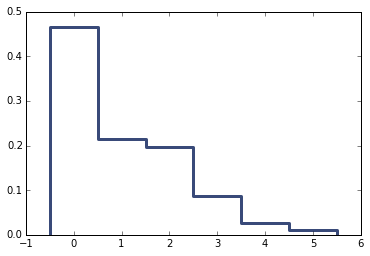

In [21]:
thinkplot.Pmf(pmf)

Define <tt>BiasPmf</tt>.

In [23]:
def BiasPmf(pmf, label=''):
    """Returns the Pmf with oversampling proportional to value.

    If pmf is the distribution of true values, the result is the
    distribution that would be seen if values are oversampled in
    proportion to their values; for example, if you ask students
    how big their classes are, large classes are oversampled in
    proportion to their size.

    Args:
      pmf: Pmf object.
      label: string label for the new Pmf.

     Returns:
       Pmf object
    """
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

Make a the biased Pmf of children in the household, as observed if you surveyed the children instead of the respondents.

In [24]:
pmf_bias = BiasPmf(pmf, label='biased')

In [27]:
pmf_bias

Pmf({0: 0.0, 1: 0.20899335717935616, 2: 0.38323965252938175, 3: 0.25523760858456823, 4: 0.10015329586101177, 5: 0.052376085845682166})

Display the actual Pmf and the biased Pmf on the same axes.

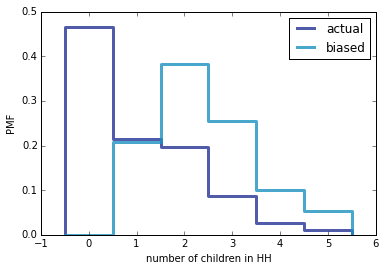

In [26]:
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, pmf_bias])
thinkplot.show(xlabel='number of children in HH', ylabel='PMF')

Compute the means of the two Pmfs.

In [28]:
pmf.Mean()

1.0242051550438309

In [29]:
pmf_bias.Mean()

2.4036791006642821

In [32]:
def PmfMean(pmf):
    mean = 0.0
    for x, p in pmf.d.items():
        mean += p*x
    return mean
        

In [33]:
PmfMean(pmf)

1.0242051550438309

In [36]:
def PmfVar(pmf):
    mean = PmfMean(pmf)
    var = 0.0
    for x, p in pmf.d.items():
        var += p * (x - mean)**2
    return var

In [37]:
PmfVar(pmf)

1.4128643263531195

In [38]:
pmf.Var()

1.4128643263531195

In [ ]:
df = nsfg.ReadFemPreg()

In [8]:
live = df[df.outcome == 1]
# use normal length births
live = live[live.prglngth >= 37]

In [9]:
preg_map = nsfg.MakePregMap(live)

In [17]:
# preg_map.items() gives tuples of key value pairs

diffs = []
for mom, indices in preg_map.items():
    lengths = live.loc[indices].prglngth.values
    if len(lengths) > 1:
        diffs.extend([lengths[0] - x for x in lengths[1:]])
        

In [19]:
np.mean(diffs)

0.18850574712643678

/Users/mmolli/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


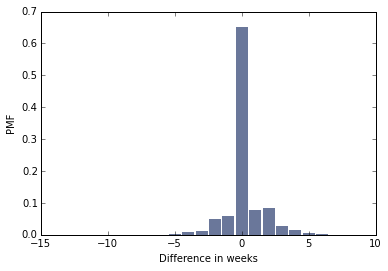

In [21]:
pmf = thinkstats2.Pmf(diffs)
thinkplot.Hist(pmf, align='center')
thinkplot.Show(xlabel='Difference in weeks',
               ylabel='PMF')